<h1 style="color:red"><center>Makine Öğrenmesi Sınıflandırma Algoritmaları Kullanarak Fiziksel Özellikleri Verilen Penguenler'in Türlerinin Tespit Edilmesi</center></h1>

<h3>   Motivasyon<h>

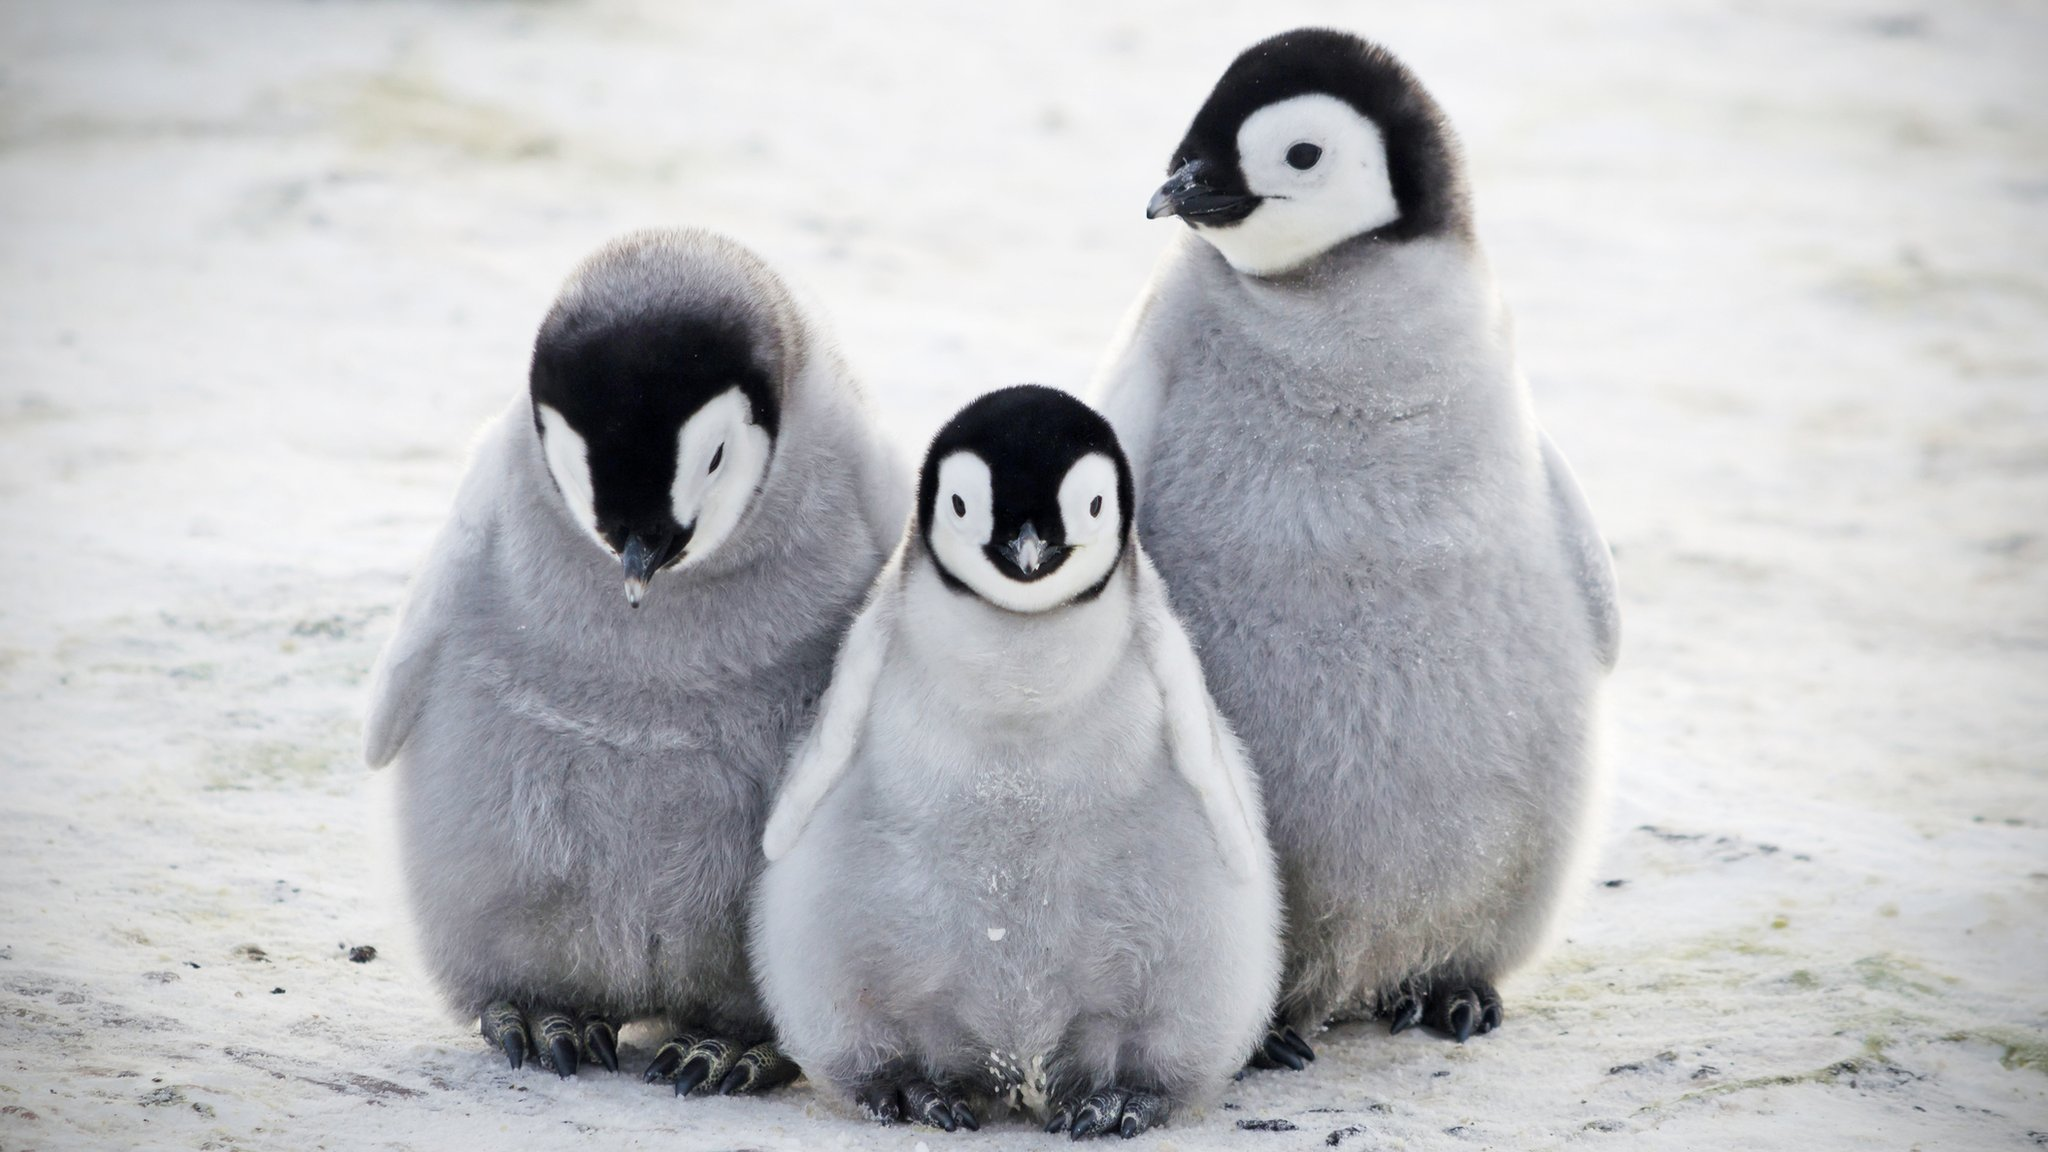

<b>Bu çalışma ile Palmer Takımadaları'nda yaşayan penguen türlerinin , gaga boyu , gaga derinliği , palet uzunluğu ve vücut kütlesi gibi özellikleri kullanılarak makine öğrenme algoritmaları ile sınıflandırılması ve penguen türlerinin belirlenmesinde araştırmacılara yardımcı olması amaçlanmıştır<b>

<h4>Kullanılan Algoritmalar<h4>
    <ul>
  <li>DecisionTree Classifier</li>
  <li>LogisticRegressor</li>
  <li>Keras Classifier</li>
</ul>

In [1]:
#### Kütüphanelerin yüklenmesi , kullanılmayacak kolonların drop edilmesi.
#### Dataset kaynağı -> https://github.com/mwaskom/seaborn-data

import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df_penguin = sns.load_dataset('penguins')
df_penguin = df_penguin.drop(['island','sex'],axis =1)
df_penguin

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0
...,...,...,...,...,...
339,Gentoo,NaN,NaN,NaN,NaN
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


In [ ]:
df_penguin['species'].value_counts()

## ------------------- Eksik Veri Analizi----------------------

In [2]:
#### NaN değer içeren kolonların kontrolü

nan_index = (df_penguin.isna())
df_penguin[nan_index]
df_penguin.isna().sum()

species              0
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [3]:
# NaN olan kategorik değerler için , ilgili sütunda en fazla frekansa sahip sınıf değeri atandı. 

df_penguin["species"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True)
df_penguin.isna().sum()

species              0
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [4]:
#### Numerik olan değerler ayrı dataframe içine alındı.

df_numerical= pd.DataFrame(data=df_penguin[df_penguin.columns.difference(['species'])],
                         columns=df_penguin.columns.difference(['species']))


#### NaN değer içeren numerik değerler için , ilgili sütunun ortalaması atandı.
df_categorical = df_penguin.iloc[:,:1]
df_numerical=df_numerical.apply(lambda x: x.fillna(x.mean()),axis=0)
df_numerical.isna().sum()

bill_depth_mm        0
bill_length_mm       0
body_mass_g          0
flipper_length_mm    0
dtype: int64

In [5]:
#### NaN değerler temizlendikten sonra kategorik-numerik dataframe birleştirildi.

df_main = pd.concat([df_numerical,df_categorical],axis=1)
df_main.isna().sum()

bill_depth_mm        0
bill_length_mm       0
body_mass_g          0
flipper_length_mm    0
species              0
dtype: int64

In [ ]:
#### Aykırı değer analizi için görselleştirme.

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(25,5))
sns.boxplot(ax=axes[0],x=df_main['bill_length_mm'])
sns.boxplot(ax=axes[1],x=df_main['bill_depth_mm'])
sns.boxplot(ax=axes[2],x=df_main['flipper_length_mm'])
sns.boxplot(ax=axes[3],x=df_numerical['body_mass_g'])

In [6]:
#### Veri setinde aykırı değer bulunmadığı için el ile eklendi
#### Aykırı olan değeri 344. sütunda görebilirsiniz.

df_numerical.loc[len(df_numerical.index)] = [18,100,1500,190]
df_numerical

,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm
0,18.70000,39.10000,3750.000000,181.000000
1,17.40000,39.50000,3800.000000,186.000000
2,18.00000,40.30000,3250.000000,195.000000
3,17.15117,43.92193,4201.754386,200.915205
4,19.30000,36.70000,3450.000000,193.000000
...,...,...,...,...
340,14.30000,46.80000,4850.000000,215.000000
341,15.70000,50.40000,5750.000000,222.000000
342,14.80000,45.20000,5200.000000,212.000000
343,16.10000,49.90000,5400.000000,213.000000


In [ ]:
#### Eklenen aykırı değerlerin görselleştirilmesi.
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax=axes[0],x=df_numerical['bill_length_mm'])
sns.boxplot(ax=axes[1],x=df_numerical['body_mass_g'])

In [7]:
#### Aykırı değerlerin temizlenmesi için zscore kullanımı.
#### Standart dağılımın dışında olan değerler , yani aykırı değerler temizlenir.
from scipy import stats
df_numerical=df_numerical[(np.abs(stats.zscore(df_numerical.iloc[:,:-1])) < 3).all(axis=1)]
df_numerical

,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm
0,18.70000,39.10000,3750.000000,181.000000
1,17.40000,39.50000,3800.000000,186.000000
2,18.00000,40.30000,3250.000000,195.000000
3,17.15117,43.92193,4201.754386,200.915205
4,19.30000,36.70000,3450.000000,193.000000
...,...,...,...,...
339,17.15117,43.92193,4201.754386,200.915205
340,14.30000,46.80000,4850.000000,215.000000
341,15.70000,50.40000,5750.000000,222.000000
342,14.80000,45.20000,5200.000000,212.000000


## ---------------------Standardizasyon--------------------

In [8]:
#### Min-Max Scaling kullanıldı.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_numerical.iloc[:,:] = scaler.fit_transform(df_numerical.iloc[:,:])

print(df_numerical)
if type(df_categorical['species'][0]) != np.int64:
    df_categorical=df_categorical[['species']].replace(['Adelie','Gentoo','Chinstrap'],[0,1,2])
    print(df_categorical)

     bill_depth_mm  bill_length_mm  body_mass_g  flipper_length_mm
0         0.666667        0.254545     0.291667           0.152542
1         0.511905        0.269091     0.305556           0.237288
2         0.583333        0.298182     0.152778           0.389831
3         0.482282        0.429888     0.417154           0.490088
4         0.738095        0.167273     0.208333           0.355932
..             ...             ...          ...                ...
339       0.482282        0.429888     0.417154           0.490088
340       0.142857        0.534545     0.597222           0.728814
341       0.309524        0.665455     0.847222           0.847458
342       0.202381        0.476364     0.694444           0.677966
343       0.357143        0.647273     0.750000           0.694915

[344 rows x 4 columns]
     species
0          0
1          0
2          0
3          0
4          0
..       ...
339        1
340        1
341        1
342        1
343        1

[344 rows x 1 c

## -------------------- Özellik Seçimi------------------------------

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

x_train, x_test, y_train, y_test = train_test_split(df_numerical.values,df_categorical.values.ravel(),
                                        test_size = 0.60 ,random_state=40,stratify = df_categorical.values)

selector = SelectFromModel(estimator=DecisionTreeClassifier()).fit(x_train, y_train)


df_numerical_selected_f=df_numerical[df_numerical.columns[(selector.get_support())]]
df_numerical.columns[(selector.get_support())]

Index(['bill_length_mm', 'body_mass_g'], dtype='object')

## --------HiperParametre Ayarlamaları ve Tekrarlı Ayırma Skorları-------

In [10]:
#### DecisionTree için hiperparametre ayarı.

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(df_numerical_selected_f.values,df_categorical.values.ravel(),
                                                        test_size = 0.60 ,random_state=40,stratify = df_categorical.values)


parameters = {'criterion' : ['gini', 'entropy'],'max_depth':[2,4,6,8,10,12]}
cv = GridSearchCV(DecisionTreeClassifier(),parameters)
cv.fit(x_train,y_train)
data = {'best_params': cv.best_params_, 'best_score': cv.best_score_}  
data

{'best_params': {'criterion': 'entropy', 'max_depth': 10},
 'best_score': 0.9052910052910053}

In [11]:
#### DecisionTree için tekrarlı ayırma ile skor ölçümü.

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

rand = np.random.RandomState(seed = 20)
seeds = np.arange(10**2)
rand.shuffle(seeds)

acc_list_dt = []

dt_best_model = cv.best_estimator_

for i in seeds:
    x_train, x_test, y_train, y_test = train_test_split(df_numerical_selected_f.values,df_categorical.values.ravel(),
                                                        test_size = 0.60 ,random_state=i,stratify = df_categorical.values)
    dt_best_model.fit(x_train,y_train)
    acc_list_dt.append(dt_best_model.score(x_test,y_test))

y_pred_dt=dt_best_model.predict(x_test)
print(np.asarray(acc_list_dt).mean())
print()
print(y_pred_dt)

0.8967632850241549

[1 1 1 0 0 1 0 0 0 0 1 0 0 2 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 2 1 1 0 1 1
 0 0 2 2 1 0 1 2 2 0 1 0 0 1 1 2 1 1 0 0 1 0 0 0 1 0 2 0 1 0 1 0 1 1 1 2 0
 0 0 1 1 0 0 2 1 0 2 2 1 0 1 0 1 0 0 0 2 0 0 0 0 0 0 0 1 1 0 1 2 0 0 0 1 1
 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 2 0 1 1 1 2 2 1 1 0 1 2 1 0 1 0 0 1 1
 2 0 1 2 0 2 0 2 0 2 1 0 2 2 0 2 0 1 2 1 1 2 2 2 0 1 0 0 1 2 0 1 0 1 2 0 0
 1 2 2 1 1 0 2 0 1 0 1 0 0 1 1 1 0 1 1 1 0 2]


In [12]:
#### Logistic Regression için hiperparametre ayarı.
from sklearn.linear_model import LogisticRegression
    

params = { 'C': [0.001,0.01,0.1,1,10,100]}


cv = GridSearchCV(
    estimator=LogisticRegression(penalty='l2'),
    param_grid=params,
)


cv.fit(x_train, y_train)

lr_best_model = cv.best_estimator_
lr_best_model.fit(x_train, y_train)

LogisticRegression(C=100)

In [13]:
#### Logistic Regression için tekrarlı ayırma ile skor ölçümü.

from sklearn.model_selection import train_test_split

acc_list_lr = []

for i in seeds:
    x_train, x_test, y_train, y_test = train_test_split(df_numerical_selected_f.values,df_categorical.values.ravel(),
                                                        test_size = 0.60 ,random_state=i,stratify = df_categorical.values)
    lr_best_model.fit(x_train,y_train)
    acc_list_lr.append(lr_best_model.score(x_test,y_test))
    
y_pred_lr = lr_best_model.predict(x_test)
print(np.asarray(acc_list_lr).mean())
print()
print(y_pred_lr)

0.9415942028985507

[1 1 1 0 0 1 0 0 0 1 1 0 0 2 1 1 1 2 0 0 0 0 0 0 0 0 1 1 0 1 0 2 1 1 0 1 1
 0 0 2 2 1 0 1 2 2 0 0 0 0 1 1 2 1 1 0 0 1 0 1 0 1 1 2 0 1 0 1 0 1 1 1 2 0
 0 0 0 1 0 0 2 1 0 1 2 0 0 1 1 1 0 0 0 2 0 0 0 0 0 0 0 1 1 1 1 2 2 0 0 2 1
 2 0 2 0 1 1 0 0 0 0 2 1 1 1 0 0 1 0 2 0 1 1 1 2 2 1 1 0 1 2 2 0 1 0 0 1 1
 2 0 1 2 0 2 0 2 0 2 1 0 2 2 2 2 0 0 2 1 1 2 2 2 0 1 0 0 1 2 0 1 0 1 0 2 1
 1 1 0 1 0 0 2 0 1 0 1 0 0 1 0 1 0 1 1 1 0 2]


In [14]:
#### Sinir ağı.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

if type(df_categorical['species'][0]) != np.int64:
    df_categorical=df_categorical[['species']].replace(['Adelie','Gentoo','Chinstrap'],[0,1,2])

x_train, x_test, y_train, y_test = train_test_split(df_numerical_selected_f.values,df_categorical.values.ravel(),
                                                    test_size = 0.60 ,random_state=43,stratify = df_categorical.values)



def baseline_model():  
    model = Sequential()
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

nn = KerasClassifier(build_fn=baseline_model,batch_size=1)

In [15]:
#### Sinir ağı için tekrarlı ayırma ile skor ölçümü.

from sklearn.model_selection import train_test_split


acc_list_nn = []

for i in seeds:
    x_train, x_test, y_train, y_test = train_test_split(df_numerical_selected_f.values,df_categorical.values.ravel(),
                                                        test_size = 0.60 ,random_state=i,stratify = df_categorical.values)
    nn.fit(x_train,y_train,epochs = 1)
    acc_list_nn.append(nn.score(x_test,y_test))

y_pred_nn = nn.predict(x_test)
y_pred_nn = (y_pred_nn > 0.5) # oluşan değerler için 0.5 üzeri true kabul edildi.
y_pred_nn=np.array(list(map(np.int64,y_pred_nn))) # boolean -> integer mapping
np.asarray(acc_list_lr).mean()

207/207 [==============================] - 0s 698us/step - loss: 1.0276 - accuracy: 0.5411


207/207 [==============================] - 0s 676us/step - loss: 1.0071 - accuracy: 0.5314


0.9415942028985507

## -------------------------BAŞARI ÖLÇÜTLERİ-------------------------

### -------------------------------DesicionTree Classifier--------------------------------------

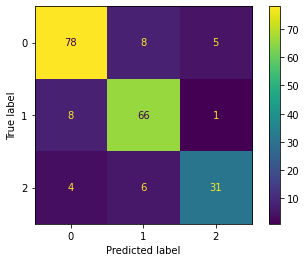

              precision    recall  f1-score   support

      Adelie       0.87      0.86      0.86        91
   Chinstrap       0.82      0.88      0.85        75
      Gentoo       0.84      0.76      0.79        41

    accuracy                           0.85       207
   macro avg       0.84      0.83      0.84       207
weighted avg       0.85      0.85      0.84       207



In [16]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

plot_confusion_matrix(dt_best_model.fit(x_train,y_train),x_test, y_test)  
plt.show()
print(classification_report(y_test,dt_best_model.predict(x_test), target_names=['Adelie', 'Chinstrap', 'Gentoo']))

### --------------------------------Logistic Regression --------------------------------------

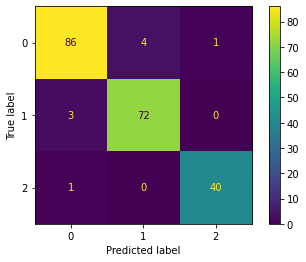

              precision    recall  f1-score   support

      Adelie       0.96      0.95      0.95        91
   Chinstrap       0.95      0.96      0.95        75
      Gentoo       0.98      0.98      0.98        41

    accuracy                           0.96       207
   macro avg       0.96      0.96      0.96       207
weighted avg       0.96      0.96      0.96       207



In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

plot_confusion_matrix(lr_best_model.fit(x_train,y_train),x_test, y_test)  
plt.show()
print(classification_report(y_test,lr_best_model.predict(x_test), target_names=['Adelie', 'Chinstrap', 'Gentoo']))

### --------------------------------Neural Network--------------------------------------

              precision    recall  f1-score   support

      Adelie       0.44      0.25      0.32        91
   Chinstrap       0.48      1.00      0.65        75
      Gentoo       0.00      0.00      0.00        41

    accuracy                           0.47       207
   macro avg       0.31      0.42      0.32       207
weighted avg       0.37      0.47      0.38       207



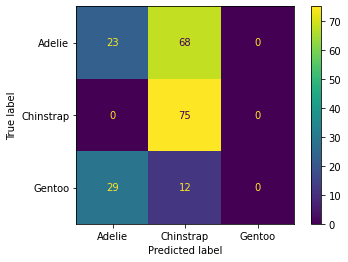

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_nn)


from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Adelie', 'Chinstrap', 'Gentoo'])


disp.plot()
print(classification_report(y_test,y_pred_nn, target_names=['Adelie', 'Chinstrap', 'Gentoo']))

## -----------------------------İSTATİSTİK TESTLERİ-------------------------------

## -----------------------------DecisionTree,LogisticRegression---------------

In [19]:
from statsmodels.stats.contingency_tables import mcnemar
import numpy as np

def mcnemar_test(y_pred1,y_pred2):
    

    table = [[sum(y_pred1^y_pred2)-sum(y_pred1&y_pred2), sum((y_pred1-y_pred2)==-1)],
             [sum((y_pred1-y_pred2)==1), sum(y_pred1&y_pred2)]]

    result = mcnemar(table, exact=True)

    print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))

    alpha = 0.05
    if result.pvalue > alpha:
        print('Same proportions of errors (fail to reject H0)')
    else:
        print('Different proportions of errors (reject H0)')

In [20]:
mcnemar_test(y_pred1=y_pred_dt,y_pred2=y_pred_lr)  # H0 hipotezi reddedildi , anlamlı bir fark oluşmadı.


statistic=8.000, p-value=0.503
Same proportions of errors (fail to reject H0)


## ------------------------DecisionTree,NeuralNetwork---------------------

In [21]:
mcnemar_test(y_pred1=y_pred_dt,y_pred2=y_pred_nn)  # H0 hipotezi reddedildi , anlamlı bir fark oluşmadı.

statistic=20.000, p-value=0.000
Different proportions of errors (reject H0)


## --------------------NeuralNetwork,LogisticRegressor------------

In [22]:
mcnemar_test(y_pred1=y_pred_nn,y_pred2=y_pred_lr)  # H0 hipotezi reddedildi , anlamlı bir fark oluşmadı.

statistic=12.000, p-value=0.000
Different proportions of errors (reject H0)


## ---------------------- FİNAL MODEL SKORLARI ----------------

<AxesSubplot:xlabel='algorithm'>

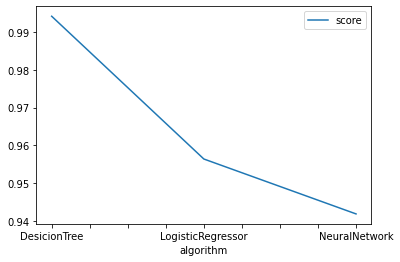

In [38]:
x , y = df_numerical_selected_f.values,df_categorical.values.ravel()
dt_score = dt_best_model.fit(x,y).score(x,y)
lr_score = lr_best_model.fit(x,y).score(x,y)

nn_score;
if nn_score is None:
    nn.fit(x,y,epochs = 50)
    nn_score = nn.score(x,y)

data = [['DesicionTree', dt_score], ['LogisticRegressor', lr_score], ['NeuralNetwork', nn_score]]
final_df = pd.DataFrame(data,columns = ['algorithm', 'score'])
final_df.plot(kind='line',x='algorithm',y='score')